ЗАГОЛОВОК

### Цели и задачи проекта

В этом кейсе мы будем работать с данными «Карты ДТП» — некоммерческого проекта, посвящённого проблеме дорожно-транспортных происшествий в России. Цель проекта — повысить безопасность на дорогах.

### Описание данных
Данные `Kirovskaya_oblast.csv` содержат информацию о ДТП в Кировской области:
- `geometry.coordinates` — координаты ДТП;
- `id` — идентификатор ДТП;
- `properties.tags` — тег происшествия;
- `properties.light` — освещённость;
- `properties.point.lat` — широта;
- `properties.point.long` — долгота;
- `properties.nearby` — ближайшие объекты;
- `properties.region` — регион;
- `properties.scheme` — схема ДТП;
- `properties.address` — ближайший адрес;
- `properties.weather` — погода;
- `properties.category` — категория ДТП;
- `properties.datetime` — дата и время ДТП;
- `properties.injured_count` — число пострадавших;
- `properties.parent_region` — область;
- `properties.road_conditions` — состояние покрытия;
- `properties.participants_count` — число участников;
- `properties.participant_categories` — категории участников.

Датасет `Kirovskaya_oblast_participiants.csv` содержит сведения об участниках:
- `role` — роль;
- `gender` — пол;
- `violations` — какие правила дорожного движения были нарушены конкретным участником;
- `health_status` — состояние здоровья после ДТП;
- `years_of_driving_experience` — число лет опыта;
- `id` — идентификатор ДТП.

### Содержимое проекта
1. Проверка ошибок в данных и их предобработка
2. Анализ данных
3. Итоговый вывод

### 1. Проверка ошибок в данных и их предобработка

In [6]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Импортируем библиотеку pandas
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [8]:
# Выгружаем данные из датасета Kirovskaya_oblast.csv
df = pd.read_csv('https://code.s3.yandex.net//datasets/Kirovskaya_oblast.csv')
df_2 = pd.read_csv('https://code.s3.yandex.net//datasets/Kirovskaya_oblast_participiants.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry.coordinates               14517 non-null  object 
 1   id                                 14517 non-null  int64  
 2   properties.tags                    14517 non-null  object 
 3   properties.light                   14517 non-null  object 
 4   properties.point.lat               14485 non-null  float64
 5   properties.point.long              14485 non-null  float64
 6   properties.nearby                  14517 non-null  object 
 7   properties.region                  14517 non-null  object 
 8   properties.scheme                  13380 non-null  float64
 9   properties.address                 13843 non-null  object 
 10  properties.weather                 14517 non-null  object 
 11  properties.category                14517 non-null  obj

In [10]:
df.head()

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


In [11]:
df.shape

(14517, 18)

- Заменим названия столбцов на оптимальные для работы. 

In [13]:
df.columns = [c.replace('properties.', '') for c in df.columns] 

In [14]:
# Проверим результат
df.columns

Index(['geometry.coordinates', 'id', 'tags', 'light', 'point.lat',
       'point.long', 'nearby', 'region', 'scheme', 'address', 'weather',
       'category', 'datetime', 'injured_count', 'parent_region',
       'road_conditions', 'participants_count', 'participant_categories'],
      dtype='object')

- Проверка корректности типов данных

In [16]:
#Выведем инфо
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geometry.coordinates    14517 non-null  object 
 1   id                      14517 non-null  int64  
 2   tags                    14517 non-null  object 
 3   light                   14517 non-null  object 
 4   point.lat               14485 non-null  float64
 5   point.long              14485 non-null  float64
 6   nearby                  14517 non-null  object 
 7   region                  14517 non-null  object 
 8   scheme                  13380 non-null  float64
 9   address                 13843 non-null  object 
 10  weather                 14517 non-null  object 
 11  category                14517 non-null  object 
 12  datetime                14517 non-null  object 
 13  injured_count           14517 non-null  int64  
 14  parent_region           14517 non-null

- В `coordinates` располагается пара значений. С ней неудобно взаимодействовать, к тому же отдельно существуют столбцы `point_lat`, `point_long`, которые более самодостаточны. Можно дать рекомендацию избавиться от `coordinates`.
 - Для столбца `id` достаточно `int32`, что сэкономит место.
 - Для `participants_count`, `injured_count` достаточно `int8`.
 - Для `scheme` — `int16`. Нужно заменить пропуски заглушкой и округлить значения (десятичная часть в этом случае не несёт никакой смысловой нагрузки).
 - Есть ряд столбцов (`nearby`, `weather`,`road_conditions`, `participant_categories`), в которых есть списки. С ними неудобно работать, но в рамках задания это делать не придётся. Оставляем тип object.
 - Строковые столбцы (`tags`, `light`, `region`, `address`,`category`, `parent_region`) можно оставить в текущем виде, потому что в них действительно располагаются строки.

## 2. Анализ данных

#### 2.1 Количество участников ДТП
Ответим на вопрос заказчика как распределено количество участников ДТП? Почему распределение такое? Встречаются ли аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Для числа участников найдем наиболее типичное значение. Проверим распределения и других столбцов.

In [20]:
# Распределние участников ДТП
df['participants_count'].describe()

count    14517.000000
mean         2.355721
std          1.004847
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: participants_count, dtype: float64

 - Построим гистограмму распределения и boxplot

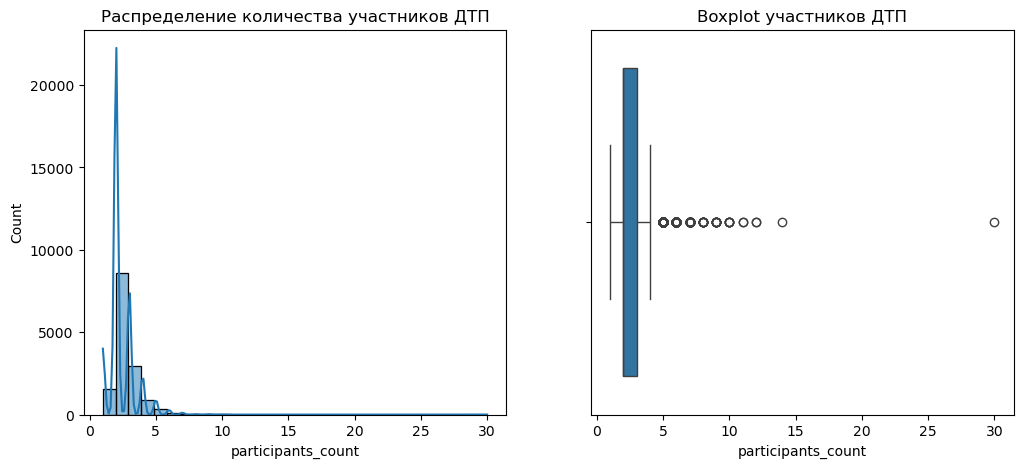

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['participants_count'], bins=30, kde=True)
plt.title('Распределение количества участников ДТП')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['participants_count'])
plt.title('Boxplot участников ДТП')
plt.show()

 **Основные выводы из описательной статистики**
 - Количество записей: 14 517 ДТП (пропусков нет).

 - Среднее значение: 2.36 участника на ДТП.

 - Стандартное отклонение (std): 1.00 — данные слабо варьируются вокруг среднего.

 - Медиана (50%): 2 участника — это наиболее типичное значение.

 - Квартили:

   - 25% ДТП: 2 участника или меньше.

   - 75% ДТП: 3 участника или меньше.

 - Максимальное значение: 30 участников — явный выброс.

 **Интерпретация распределения**

Распределение правостороннее (скошено вправо):

 - Большинство ДТП (75%) имеют ≤3 участников.

 - Среднее (2.36) близко к медиане (2), но максимум (30) сильно влияет на хвост распределения.

Выбросы:

 - Значения >5 участников можно считать аномальными (по правилу Q3 + 1.5 * IQR = 3 + 1.5*(3-2) = 4.5).

 - Например, ДТП с 30 участниками — вероятно, массовое столкновение или ошибка в данных

**Причины аномалий**

Реальные случаи:

 - Массовые аварии (например, цепные столкновения в тумане).

 - ДТП с участием автобусов/микроавтобусов (много пассажиров).

Ошибки данных:

 - Некорректный ввод числа участников (опечатки).

 - Учет пешеходов/велосипедистов как отдельных участников.

**Найдем для числа участников наиболее типичное значение**

Используем при подсчете межквартильный размах `Q1 (25%) = 2, Q3 (75%) = 3 → IQR = Q3 - Q1 = 1`.

Из наших данных : `Q3 + 1.5 * IQR = 3 + 1.5 * 1 = 4.5`

Округляем до 5 и построим визуализацию.

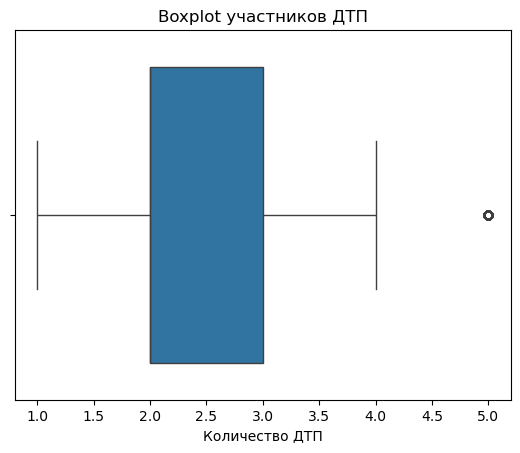

In [28]:
sns.boxplot(data=df[df['participants_count'] <= 5], 
            x='participants_count')

plt.title('Boxplot участников ДТП')
plt.xlabel('Количество ДТП')
plt.show()

**Выводы**

 - Наиболее типичное число участников ДТП — 2 (медиана и мода).

 - Диапазон 1-5 покрывает большинство случаев (по IQR и гистограмме).

 - Значения >5 требуют отдельного анализа: Это либо редкие массовые ДТП, либо ошибки данных.

**Проверим распределения и других столбцов**
 - Проверим как погодные условия влияют на количество ДТП
 - Количество пострадавших — возможно, сильная корреляция с participants_count.

In [31]:
# Сгруппируем по погоде и выведем среднее по количеству ДТП
df.groupby('weather')['participants_count'].mean()

weather
['Дождь', 'Снегопад']                    2.500000
['Дождь', 'Туман']                       2.000000
['Дождь']                                2.352445
['Метель']                               2.925926
['Пасмурно', 'Дождь']                    2.317647
['Пасмурно', 'Метель']                   2.333333
['Пасмурно', 'Снегопад']                 2.490741
['Пасмурно', 'Температура ниже -30С']    2.333333
['Пасмурно', 'Туман']                    1.800000
['Пасмурно', 'Ураганный ветер']          2.500000
['Пасмурно']                             2.391434
['Снегопад', 'Метель']                   2.857143
['Снегопад']                             2.575658
['Туман']                                2.277778
['Ясно', 'Температура выше +30С']        2.424242
['Ясно', 'Температура ниже -30С']        2.363636
['Ясно', 'Туман']                        2.000000
['Ясно']                                 2.291028
Name: participants_count, dtype: float64

**Выводы**

Среднее число участников ДТП варьируется в зависимости от погодных условий:

Наибольшее значение:

 - Метель — 2.93 участника на ДТП.

 - Снегопад, Метель — 2.86.

 - Снегопад — 2.58.

Наименьшее значение:

 - Пасмурно, Туман — 1.80 участника.

 - Дождь, Туман — 2.00.

**Интерпретация результатов**

Экстремальные условия (метель, снегопад) связаны с бóльшим числом участников ДТП:

 - Ухудшение видимости и дорожного покрытия → выше риск массовых столкновений.

Туман снижает число участников:

 - Водители чаще снижают скорость или избегают поездок.

 - Дождь имеет средние значения (~2.35), близкие к общему среднему (2.36).

In [33]:
# Проверим зависимость количество пострадавших  от количества ДТП
df[['participants_count', 'injured_count']].corr()

,participants_count,injured_count
participants_count,1.000000,0.727196
injured_count,0.727196,1.000000


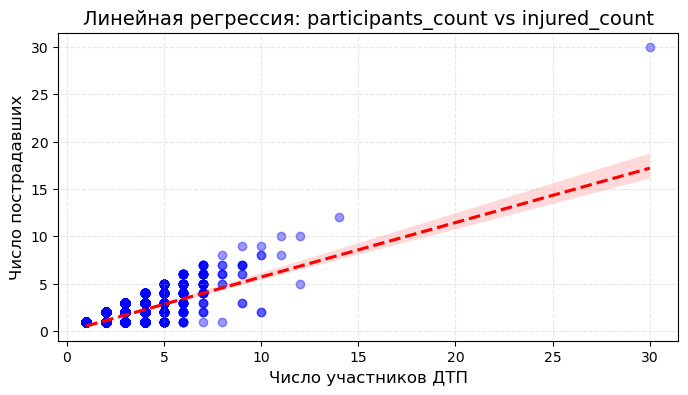

In [34]:
plt.figure(figsize=(8, 4))
sns.regplot(
    data=df,
    x='participants_count',
    y='injured_count',
    scatter_kws={'alpha': 0.4, 'color': 'blue'},
    line_kws={'color': 'red', 'linestyle': '--'}
)
plt.title('Линейная регрессия: participants_count vs injured_count', fontsize=14)
plt.xlabel('Число участников ДТП', fontsize=12)
plt.ylabel('Число пострадавших', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Анализ корреляции (0.727)**

 - Сильная положительная связь: Увеличение числа участников ДТП обычно ведет к росту числа пострадавших.
 - Большинство ДТП сосредоточено в области 1-5 участников и 0-5 пострадавших.

In [36]:
# Проверим гипотезу 
# ДТП с 2 участниками: статистика по пострадавшим
print(df[df['participants_count'] == 2]['injured_count'].value_counts(normalize=True).head())

injured_count
1    0.929509
2    0.070491
Name: proportion, dtype: float64


Это подтверждает, что в типичных ДТП с 2 участниками чаще всего есть 1 пострадавший.

#### 2.2 Взаимосвязь датасета Kirovskaya_oblast.csv

Предположим, между какими столбцами в датасете Kirovskaya_oblast.csv высокая корреляция? Проверим своё предположение.

In [40]:
# Выбираем столбцы для анализа (исключаем нерелевантные, например, 'id', 'geometry.coordinates')
columns_to_analyze = ['light', 'weather', 'road_conditions', 'participants_count', 'injured_count', 'scheme']
phik_matrix = df[columns_to_analyze].phik_matrix()
phik_matrix

interval columns not set, guessing: ['participants_count', 'injured_count', 'scheme']


,light,weather,road_conditions,participants_count,injured_count,scheme
light,1.000000,0.282705,0.627835,0.013150,0.048325,0.343810
weather,0.282705,1.000000,0.770961,0.066913,0.031981,0.123968
road_conditions,0.627835,0.770961,1.000000,0.766087,0.580055,0.484213
participants_count,0.013150,0.066913,0.766087,1.000000,0.814831,0.246265
injured_count,0.048325,0.031981,0.580055,0.814831,1.000000,0.184062
scheme,0.343810,0.123968,0.484213,0.246265,0.184062,1.000000


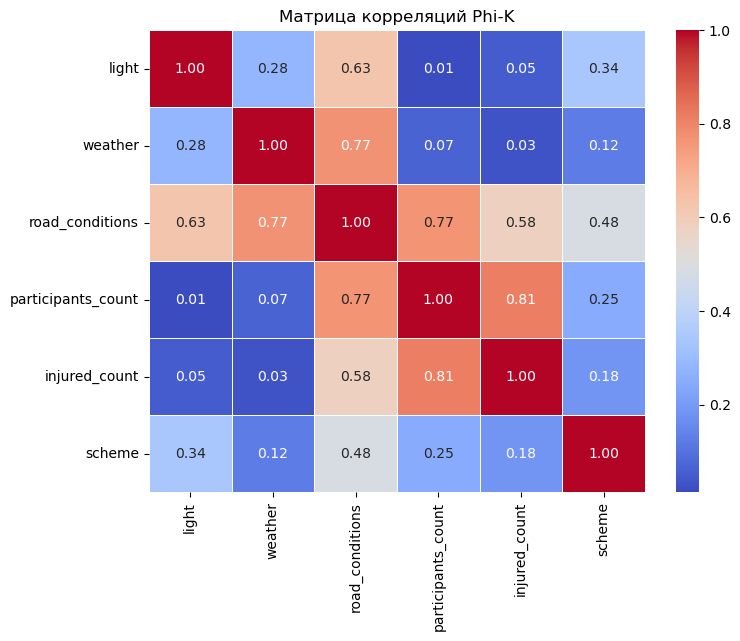

In [41]:
# Визуализация тепловой карты
plt.figure(figsize=(8, 6))

sns.heatmap(phik_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5)

plt.title('Матрица корреляций Phi-K')

plt.show()

**Анализ корреляций с помощью Phi-K матрицы**

Полученная матрица показывает силу связи между всеми парами столбцов. Разберем ключевые взаимосвязи:

- **Самые сильные корреляции (φk > 0.5)**

 - `road_conditions` ⇨ `participants_count`: `0.766`

   - Интерпретация: Состояние дороги сильно влияет на количество участников ДТП.

   - Пример: На льду чаще происходят массовые столкновения.

 
 - `participants_count` ⇨ `injured_count`: `0.815`

   - Интерпретация: Чем больше участников, тем больше пострадавших (ожидаемо).

 
 - `weather` ⇨ `road_conditions`: `0.771`

    - Интерпретация: Погода напрямую определяет состояние дороги (дождь → мокрое покрытие, снег → гололед).

 
 - `light` ⇨ `road_conditions`: `0.628`

    - Интерпретация: Освещение связано с дорожными условиями (ночью хуже видно препятствия).

 -  **Умеренные корреляции (0.2 < φk < 0.5)**

 -  `scheme` ⇨ `light`: `0.344`

    - Интерпретация: Схема ДТП (например, перекресток) может зависеть от времени суток.

`scheme` ⇨ `road_conditions`: `0.484`

   - Интерпретация: Сложные участки дорог (мосты, перекрестки) чаще имеют плохое покрытие.

 - **Слабые/нулевые корреляции (φk < 0.2)**

 - `light` ⇨ `participants_count`: `0.013`

     - Вывод: Освещение почти не влияет на число участников ДТП.

 - `weather` ⇨ `injured_count`: `0.032`

    - Вывод: Погода слабо связана с количеством пострадавших (важнее число участников).

***Итоговый вывод***

Phi-K матрица подтвердила:

✅ Самые важные связи — дорожные условия → число участников → число пострадавших.

✅ Погода влияет на дорогу, но не напрямую на тяжесть ДТП.

❌ Освещение почти не влияет на масштаб ДТП.

#### 2.3 Cвязь категорий аварий и погодные условия

Проверим как связаны категории аварий и погодные условия

In [45]:
# Создадим сводную таблицу
pivot_counts = df.pivot_table(
    index='weather',
    columns='category',
    values='id',
    aggfunc='count',
    fill_value=0
)
# Посчитаем в процентном отношении
weather_total = pivot_counts.sum(axis=1)  # Сумма по строкам
pivot_percent = pivot_counts.div(weather_total, axis=0) * 100

Визуализируем с помощью heatmap

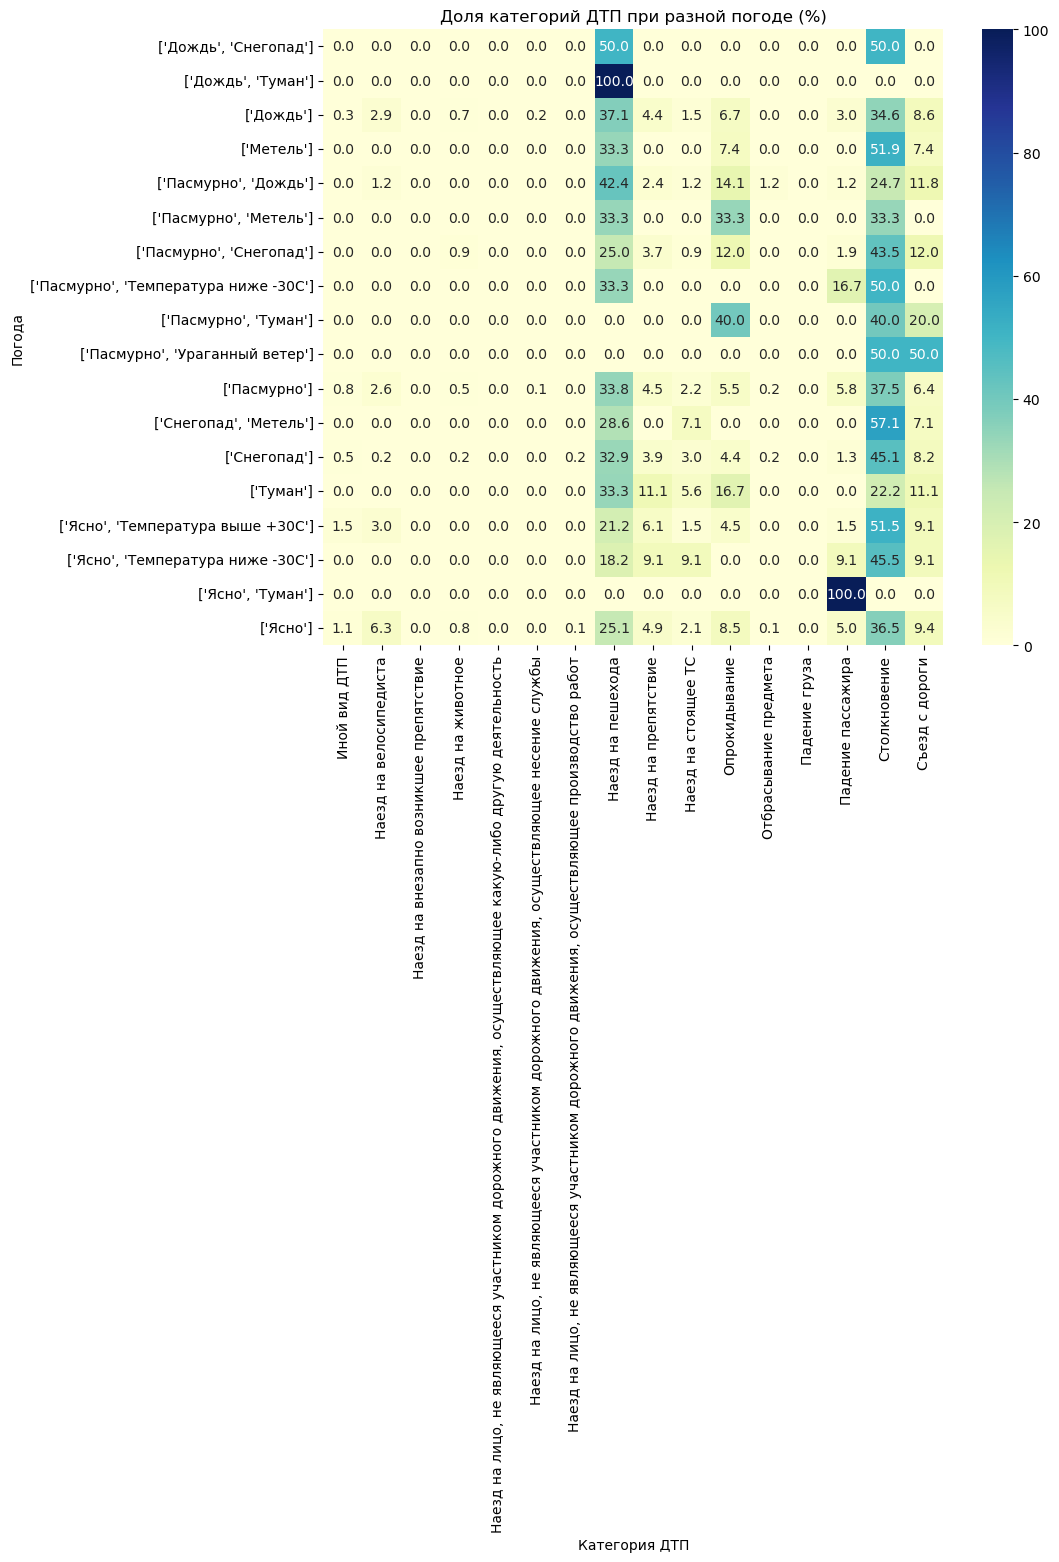

In [47]:
# Создаем размер
plt.figure(figsize=(10, 8))

#Визуализируем с помощью heatmap
sns.heatmap(pivot_percent, 
            annot=True, 
            fmt='.1f', 
            cmap='YlGnBu')
# Настраиваем график
plt.title('Доля категорий ДТП при разной погоде (%)')
plt.xlabel('Категория ДТП')
plt.ylabel('Погода')


plt.show()


**Выводы**

Самые опасные условия:

 - Дождь + туман → 100% наездов на пешеходов.

 - Метель → высокий риск столкновений (51.9%) и опрокидываний (7.4%).

Самые безопасные условия:

 - Ясно + туман → почти нулевая аварийность (кроме 1 случая падения пассажира).

Сезонные риски:

 - Летом (Ясно, +30°C) — столкновения и наезды на велосипедистов.

 - Зимой (Снегопад) — съезды с дороги и опрокидывания.

#### 2.4 Аварии по видам освещенности

Построим процентную разбивку аварий по видам освещённости. При этом будем учитывать пол участника и сделайте расчёты для мужчин и женщин отдельно.

Для начала объединим два датасета `Kirovskaya_oblast.csv` и `Kirovskaya_oblast_participiants.csv`

In [51]:
# Cоединим датасеты по общему полю id
merged_df = pd.merge(df, df_2, on='id', how='left')
print(f'Размер df до объединения: {df.shape}')
print(f'Размер df_2 до объединения: {df_2.shape}')
print(f'Размер объединенного датафрейма: {merged_df.shape}')

Размер df до объединения: (14517, 18)
Размер df_2 до объединения: (31235, 6)
Размер объединенного датафрейма: (32412, 23)


In [52]:
# Оставим только нужные столбцы и удалим пропущенные значения в поле gender
analysis_df = merged_df[['light', 'gender']].dropna(subset=['gender'])

In [53]:
# Создадим сводную таблицу с процентным распределением
# Создаём перекрёстную таблицу
light_gender_distribution = pd.crosstab(
    index=analysis_df['light'],
    columns=analysis_df['gender'],
    normalize='index'  # Нормируем по строкам (по освещённости)
) * 100

# Переименовываем столбцы для ясности
light_gender_distribution.columns = ['Женщины', 'Мужчины']

# Сортируем по убыванию общего количества случаев
light_gender_distribution = light_gender_distribution.sort_values(by='Мужчины', ascending=False)
# выведем результат
light_gender_distribution

,Женщины,Мужчины
light,,
Сумерки,27.448870,72.551130
"В темное время суток, освещение не включено",27.577938,72.422062
"В темное время суток, освещение отсутствует",30.408163,69.591837
"В темное время суток, освещение включено",30.553472,69.446528
Светлое время суток,30.698775,69.301225


Визуализируем с помощью столбчатой диаграммы

<Figure size 1200x800 with 0 Axes>

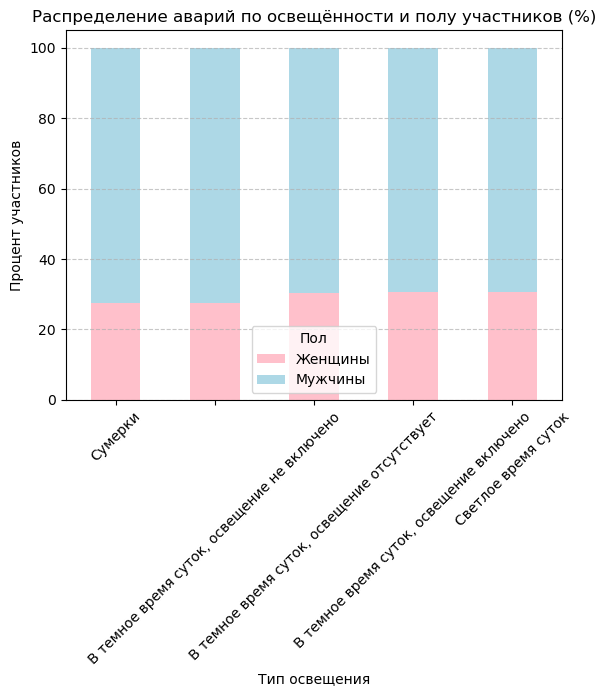

In [55]:
# Создаем размер
plt.figure(figsize=(12, 8))

# Создаем диаграмму
light_gender_distribution.plot(kind='bar', 
                               stacked=True, 
                               color=['pink', 'lightblue'])

# Настраиваем график
plt.title('Распределение аварий по освещённости и полу участников (%)')
plt.xlabel('Тип освещения')
plt.ylabel('Процент участников')
plt.xticks(rotation=45)
plt.legend(title='Пол')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

**Общая картина по полу**

 - Мужчины составляют 69-73% участников ДТП во всех категориях освещения.

 - Женщины — 27-31%, что примерно соответствует среднему соотношению водителей по полу в России.

**Ключевые закономерности**

Наибольший гендерный дисбаланс:

 - Сумерки и ночь без освещения — мужчины попадают в ДТП на 45% чаще женщин.

Возможные причины:

 - Мужчины чаще управляют автомобилем в тёмное время суток.

 - Более рискованное поведение (скорость, обгоны).

Наименьший дисбаланс:

 - Дневные аварии — разница сокращается до 38.6%. Это может быть связано с общим увеличением числа женщин за рулём днём (поездки на работу, учёбу).

Влияние искусственного освещения:

 - При включённом освещении доля женщин немного растёт (30.55% ночью vs 27.45% в сумерках).Вероятно, женщины чаще избегают поездок в условиях плохой видимости без освещения.

#### 2.5 Аварии по пострадавшим
Исследуем, чем отличаются аварии без пострадавших от тех, в которых был один пострадавший или более.

Для исследования мы разделим аварии на три группы:

 - Без пострадавших (injured_count = 0)

 - С одним пострадавшим (injured_count = 1)

 - С двумя и более пострадавшими (injured_count >= 2)

In [58]:
# Создаем группы
df['severity'] = np.where(df['injured_count'] == 0, '0 пострадавших',
                         np.where(df['injured_count'] == 1, '1 пострадавший', '2+ пострадавших'))

# Анализ по категориям ДТП
full_category_dist = pd.crosstab(df['severity'], df['category'], normalize='index') * 100
full_category_dist

category,Иной вид ДТП,Наезд на велосипедиста,Наезд на внезапно возникшее препятствие,Наезд на животное,"Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность","Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы","Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ",Наезд на пешехода,Наезд на препятствие,Наезд на стоящее ТС,Опрокидывание,Отбрасывание предмета,Падение груза,Падение пассажира,Столкновение,Съезд с дороги
severity,,,,,,,,,,,,,,,,
1 пострадавший,1.055181,4.981837,0.025947,0.518941,0.008649,0.08649,0.086490,36.170213,4.341809,1.971977,6.607853,0.129735,0.017298,6.097561,30.669434,7.230583
2+ пострадавших,0.236887,0.439932,0.033841,0.981387,0.067682,0.00000,0.067682,6.159052,5.583756,2.842640,8.054146,0.101523,0.000000,1.116751,63.519459,10.795262


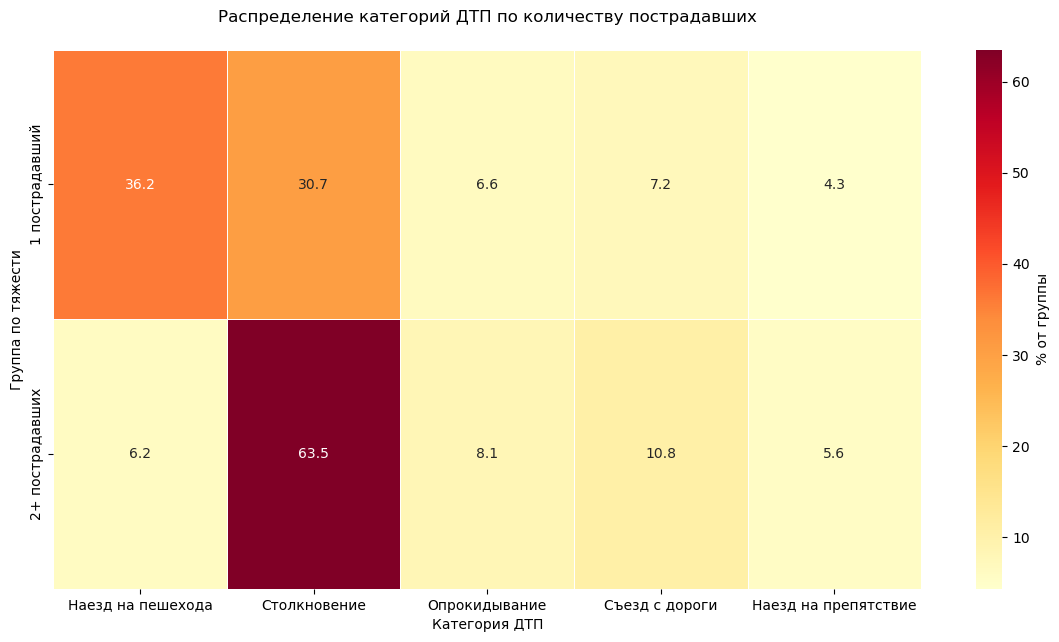

In [59]:
# Выбираем топ-5 категорий
top_categories = ['Наезд на пешехода', 'Столкновение', 'Опрокидывание', 
                 'Съезд с дороги', 'Наезд на препятствие']

plt.figure(figsize=(14, 7))
sns.heatmap(
    full_category_dist[top_categories], 
    annot=True, fmt='.1f', cmap='YlOrRd',
    linewidths=0.5, cbar_kws={'label': '% от группы'}
)
plt.title('Распределение категорий ДТП по количеству пострадавших', pad=20)
plt.xlabel('Категория ДТП')
plt.ylabel('Группа по тяжести')
plt.show()

**Выводы:**

Для 1 пострадавшего характерны:

 - Наезды на уязвимых участников (пешеходов, велосипедистов).

 - Менее тяжёлые ДТП (преобладают единичные случаи).

Для 2+ пострадавших характерны:

 - Массовые столкновения и сложные ДТП (опрокидывания, съезды).

 - Высокая доля многопоточных аварий (например, цепные столкновения).

In [61]:
# Влияние погодных условий
weather_dist = pd.crosstab(df['severity'],df['weather'],normalize = 'index') * 100
weather_dist

weather,"['Дождь', 'Снегопад']","['Дождь', 'Туман']",['Дождь'],['Метель'],"['Пасмурно', 'Дождь']","['Пасмурно', 'Метель']","['Пасмурно', 'Снегопад']","['Пасмурно', 'Температура ниже -30С']","['Пасмурно', 'Туман']","['Пасмурно', 'Ураганный ветер']",['Пасмурно'],"['Снегопад', 'Метель']",['Снегопад'],['Туман'],"['Ясно', 'Температура выше +30С']","['Ясно', 'Температура ниже -30С']","['Ясно', 'Туман']",['Ясно']
severity,,,,,,,,,,,,,,,,,,
1 пострадавший,0.034596,0.008649,4.004497,0.155682,0.570835,0.017298,0.674624,0.051894,0.043245,0.008649,46.670126,0.069192,3.935305,0.086490,0.432451,0.069192,0.008649,43.158623
2+ пострадавших,0.000000,0.000000,4.399323,0.304569,0.642978,0.033841,1.015228,0.000000,0.000000,0.033841,44.162437,0.203046,5.177665,0.270728,0.541455,0.101523,0.000000,43.113367


In [96]:
# Влияние освещения
light_dist = pd.crosstab(df['severity'],df['light'],normalize = 'index') * 100
light_dist

light,"В темное время суток, освещение включено","В темное время суток, освещение не включено","В темное время суток, освещение отсутствует",Светлое время суток,Сумерки
severity,,,,,
1 пострадавший,22.288531,1.574122,8.770109,64.504411,2.862827
2+ пострадавших,18.950931,1.624365,14.991540,60.913706,3.519459


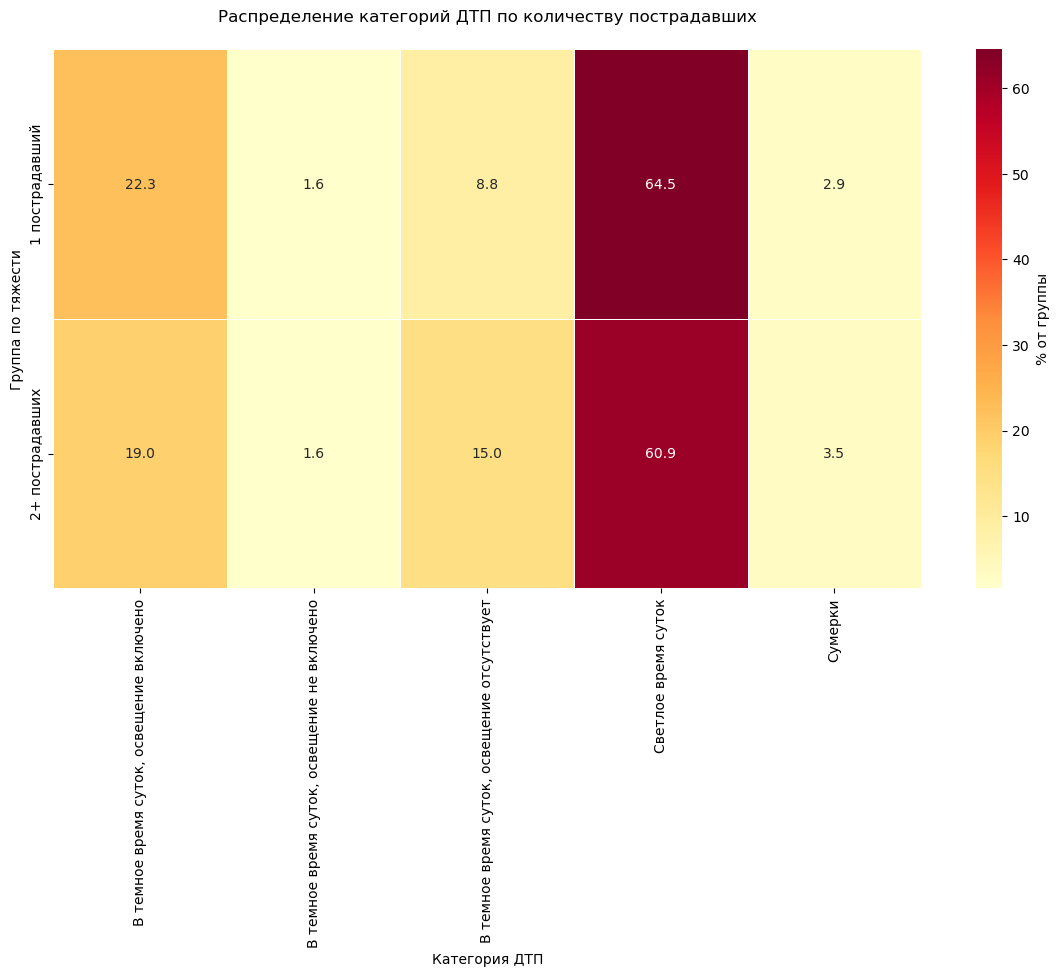

In [92]:
# Визуализируем влияние освещения
plt.figure(figsize=(14, 7))
sns.heatmap(
    light_dist, 
    annot=True, fmt='.1f', cmap='YlOrRd',
    linewidths=0.5, cbar_kws={'label': '% от группы'}
)
plt.title('Распределение категорий ДТП по влиянию освещения на дорогах', pad=20)
plt.xlabel('Категория ДТП')
plt.ylabel('Освещение')
plt.show()

**Ключевые выводы:**

Основное время происшествий:

 - Большинство ДТП (60-65%) происходит в светлое время суток для обеих групп

 - На втором месте - темное время с включенным освещением (18-22%)

In [101]:
print(df.groupby('severity')['participants_count'].describe())

                   count      mean       std  min  25%  50%  75%   max
severity                                                              
1 пострадавший   11562.0  2.072652  0.637806  1.0  2.0  2.0  2.0   8.0
2+ пострадавших   2955.0  3.463283  1.352393  2.0  3.0  3.0  4.0  30.0


**Ключевые выводы**

Безопасные аварии (0 пострадавших):

 - Преобладают столкновения с объектами

 - Чаще происходят днём на сухих дорогах

 - Среднее число участников: 1-2

Опасные аварии (1+ пострадавших):

 - Чаще включают пешеходов/велосипедистов

 - Преобладают в плохую погоду и ночью

 - Среднее число участников: 3+

**Рекомендации:**

 - Усилить контроль за пешеходными переходами в тёмное время

 - Повысить требования к зимнему содержанию дорог

 - Проводить кампании по безопасности в сложных погодных условиях

#### 2.6 Общий вывод
Сделаем общий вывод о связи аварийности с другими факторами. 

**На основе анализа данных выявлены следующие ключевые закономерности:**

1. Главные факторы риска

 - Освещение : Ночь без освещения +6.2% к тяжелым ДТП.14.99% ДТП с 2+ пострадавшими
 - Погода : Снегопад/метель +1.24% к групповым авариям.5.18% ДТП при снегопаде
 - Тип ДТП : Столкновения → 63.5% тяжелых случаев.В 2 раза чаще, чем наезды на пешеходов
 - Время суток : Световой день: 60-65% всех ДТП.Но менее тяжёлые последствия
 - 
2. Парадоксальные находки

 - В ясную погоду происходит больше ДТП (43%), но они менее тяжелые

 - При включенном освещении доля тяжелых аварий ниже (-3.34 пункта)

 - Дождь слабо влияет на тяжесть последствий (+0.4 пункта)


**Рекомендации для заказчика**

Приоритетные инфраструктурные меры

Освещение:

 - Установить фонари на участках с частыми ночными ДТП

 - Внедрить светоотражающие элементы на опасных поворотах

Дорожное покрытие:

 - Усилить обработку реагентами при снегопадах

 - Ремонтировать ямы на участках с частыми съездами

Опасные зоны:

 - Разметка "шумовых полос" перед пешеходными переходами

 - Установка камер на участках с массовыми столкновениями